<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [34]:

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# column_stack = 리스트 2개 연결 튜플 형식
fish_data=np.column_stack((length,weight))
# concatenate = 배열 연결
fish_target=np.concatenate((np.ones(35), np.zeros(14)))
"""
train,test 나누기
stratify = 이 클래스 비율에 맞게 데이터 나누기
random_state = 랜덤 시드
"""
train_input, test_input, train_target, test_target=train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)

kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)


1.0

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


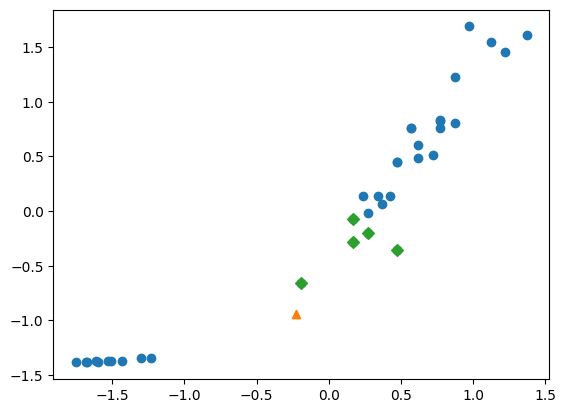

In [47]:



# 평균, 무조건 훈련데이터로만 해야햠. 테스트까지하면 정보 누출임
mean = np.mean(train_input, axis=0)
# 분산
std = np.std(train_input, axis=0)

# 데이터 전처리, 표준점수 기반
"""
KNN은 거리(distance)를 기준으로 이웃을 찾기 때문에,
특성들의 단위와 범위가 다르면 거리 계산이 왜곡된다.
이를 방지하고 모든 특성이 동일한 기준에서 거리 계산에 참여하도록 하기 위해
표준점수 기반으로 데이터를 변환한다.
예제에선 wiehgt의 영향이 너무 컸음 데이터가
길이 정보는 무시됨
"""
train_scaled =(train_input-mean)/std
new=([25,150]-mean)/std


plt.show()

test_scaled=(test_input-mean)/std
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

# 이웃 거리, 인덱스 반환  k개
distance, indexes=kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
print(distance, indexes)